## Demo for learning dual channel PSF from bead data

##### Setup environment

In [10]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [11]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='voxel',channeltype='2ch',sysfile='M2')

##### Edit user defined parameters

In [12]:
L.param.datapath = 'E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = 'Pos' # keyword for your data file
L.param.subfolder = 'Pos' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 1
L.param.ccd_offset = 400
L.param.FOV.z_step = 5  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.ref_channel = 1 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.max_bead_number = 100 # lower this number if out of memory 

Optional parameters, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{mirrortype}}$   | `'up-down', 'left-right'` | `'up-down'`
$\small\color{skyblue}{\mathrm{channel\_arrange}}$   | `'up-down', 'left-right'` | `'up-down'`

Optional parameters for zernike PSF learning, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'zernike', 'zernike_vector', 'pupil', 'pupil_vector'` | `'zernike_vector'`


##### Start learning

In [13]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos0_30ms_conventional_Z_1\Pos0_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos1_30ms_conventional_Z_1\Pos1_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos10_30ms_conventional_Z_1\Pos10_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos11_30ms_conventional_Z_1\Pos11_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos2_30ms_conventional_Z_1\Pos2_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos3_30ms_conventional_Z_1\Pos3_30ms_conventional_Z_1_MMStack_Default.om

3/6: learning: 57/100 [00:03s] 15.08it/s, current loss: 20.84902, total time: 3.78s 
3/6: learning: 56/100 [00:03s] 15.83it/s, current loss: 16.66943, total time: 7.31s
3/6: learning: 209/250 [00:27s]  7.59it/s, current loss: 37.01312, total time: 34.85s 
4/6: calculating spline coefficients: 2/2 [00:03s]  1.74s/it total time: 38.32s
5/6: localization: 4/4 [00:06s]  1.63s/it total time: 44.83s


outlier id: [ 3  6  9 16 21 26 27 34 40 43 46 50 61 80 81 82]
rois shape channel 0: (67, 48, 21, 21)
rois shape channel 1: (67, 48, 21, 21)


3/6: learning: 207/250 [00:25s]  8.07it/s, current loss: 20.02433, total time: 70.47s
4/6: calculating spline coefficients: 2/2 [00:03s]  1.75s/it total time: 73.95s
5/6: localization: 4/4 [00:06s]  1.59s/it total time: 80.31s
6/6: saving results: [00:00s] total time: 80.46s


##### Show results

In [14]:
f,p = io.h5.load(resfile) # load result file

channel 0


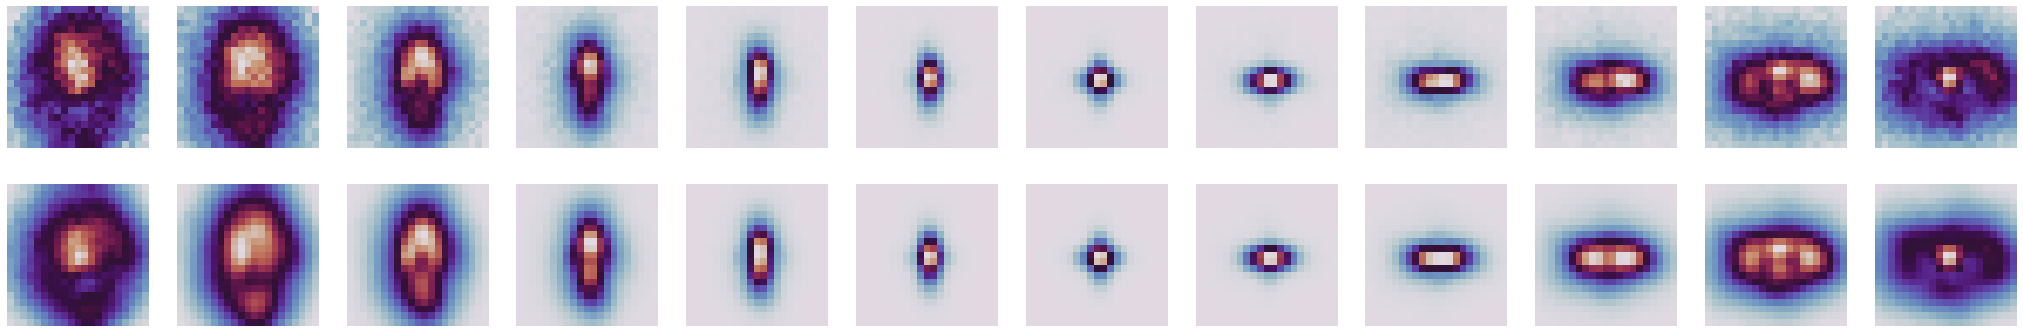

channel 1


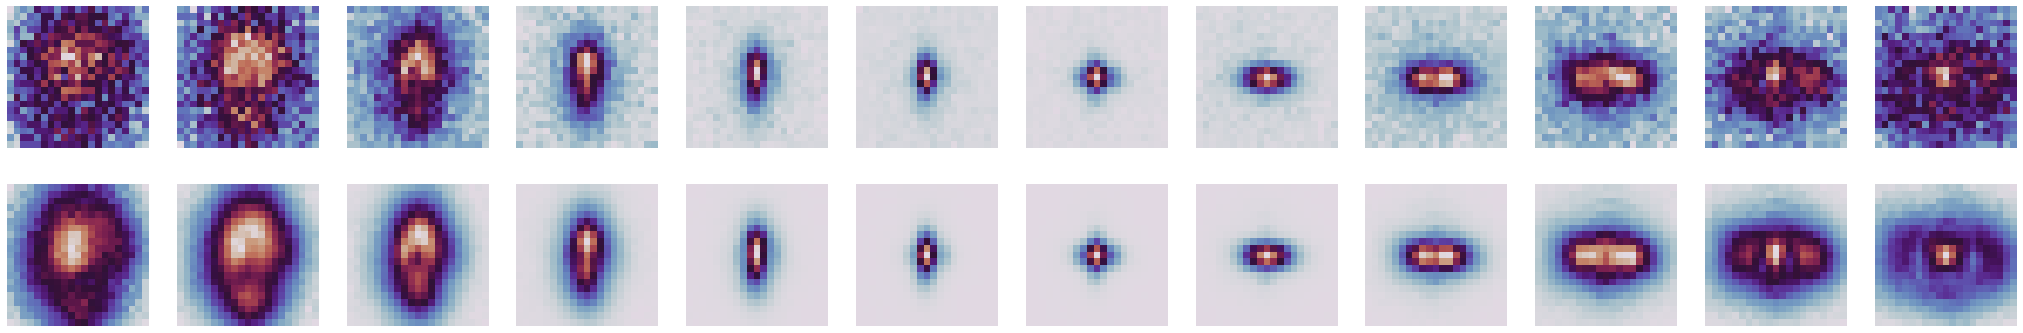

In [15]:
showpsfvsdata(f,p,index=0)

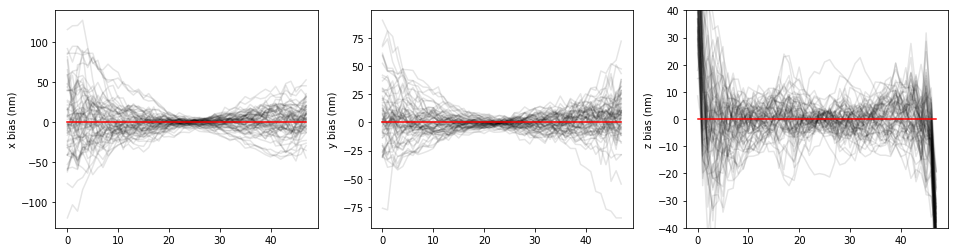

In [16]:
showlocalization(f,p)

##### Optional plots

no pupil


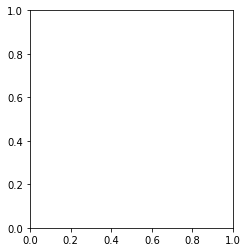

In [10]:
try:
    showpupil(f,p)
except:
    print('no pupil')

no Zernike coefficients


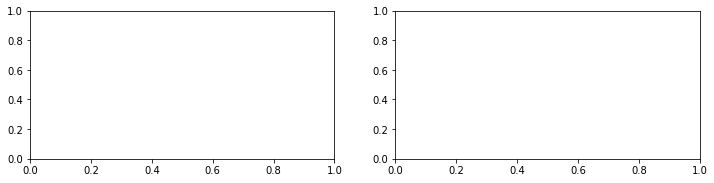

In [11]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

[[ 0.9995 -0.0363  0.    ]
 [ 0.036   0.9976 -0.    ]
 [-0.3331 -1.6136  1.    ]]


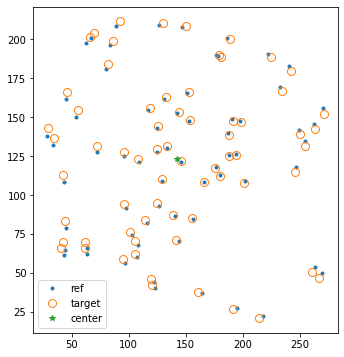

In [17]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

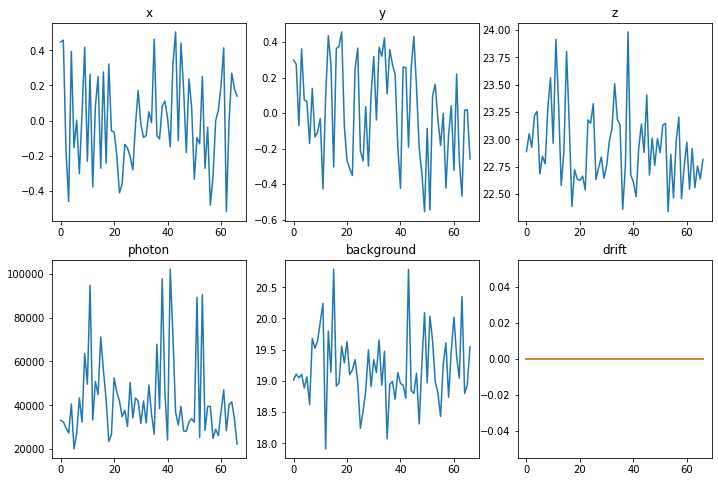

In [18]:
showlearnedparam(f,p)